<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%201/05/assignment05_debrief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Debrief on Common Questions on the Assignment

Based on your [experiences and questions related to assignment 5](https://docs.google.com/document/d/10GkR4LS2FY722CpCM_H8IMjdA_XIOaihPJxFiI4HFsY/edit?usp=sharing), we put together this notebook.  We focused on things that were confusing / frustrating to increase understanding and comfort within the class.  In addition to answering common questions with text, we'll also include code examples and links to external resources.

Before we get started, let's download the datasets and import some libraries we're going to be working with (we'll talk a bit about Cactus and MNIST, but the code examples will only use these three).
* Titanic
* Smile Detection
* Pet Adoption

In [0]:
import gdown
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

gdown.download('https://drive.google.com/uc?authuser=0&id=0B0UHkPLHsgyoclIxTlhDd29tMjQ&export=download', 'train_human_genki.mat', False)
data = loadmat('train_human_genki.mat')
smile_images = data['images']
smile_images_vectorized = smile_images.reshape(-1, smile_images.shape[2]).T
# smile_expressions contains the expressions of each face (1 for smiling, 0 for not smiling)
smile_y = data['expressions']

gdown.download('https://drive.google.com/uc?authuser=0&id=1XIFiL3WxxR6M2nWgADi3xWvuRO6A-Ov8&export=download', 'titanic_train.csv', False)
titanic_df = pd.read_csv('titanic_train.csv')

gdown.download('https://drive.google.com/uc?authuser=0&id=1ckBa2ULUhF8qvlXwX3qWMs2TJNNdPHbq&export=download', 'pet_finder_train.csv', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1A_0y9OQhLB6GrI6FW3PXXtiyGdwtXF6z&export=download', 'breed_labels.csv', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1hRb7pOd86eYTYg1D_4WF7hSkHVPeFKfJ&export=download', 'color_labels.csv', False)

pets_df = pd.read_csv('pet_finder_train.csv')
pets_breeds_df = pd.read_csv('breed_labels.csv')
pets_colors_df = pd.read_csv('color_labels.csv')

Downloading...
From: https://drive.google.com/uc?authuser=0&id=0B0UHkPLHsgyoclIxTlhDd29tMjQ&export=download
To: /content/train_human_genki.mat
64.1MB [00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1XIFiL3WxxR6M2nWgADi3xWvuRO6A-Ov8&export=download
To: /content/titanic_train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 14.8MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1ckBa2ULUhF8qvlXwX3qWMs2TJNNdPHbq&export=download
To: /content/pet_finder_train.csv
6.69MB [00:00, 76.4MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1A_0y9OQhLB6GrI6FW3PXXtiyGdwtXF6z&export=download
To: /content/breed_labels.csv
100%|██████████| 6.98k/6.98k [00:00<00:00, 1.60MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1hRb7pOd86eYTYg1D_4WF7hSkHVPeFKfJ&export=download
To: /content/color_labels.csv
100%|██████████| 88.0/88.0 [00:00<00:00, 113kB/s]


## How Much Should I Know?!?

A number of folks felt unsure about how much we expected them to know about these tools at this point in the course.  As we mentioned in class, we view this as the very beginning of the process of you building comfort with these tools.  We are here to scaffold this to help improve your learning and increase your confidence (this was a major motivator behind the creation of this notebook).

Beyond the specifics of the tools we are using, the machine learning workflow is something you'll be engaging with all semester.  You will have many opportunities to learn to deal with different sorts of data.  You will learn how to train, evaluate, understand, and improve these models.

Here are some questions / comments that are representative of this class of concerns.

> We’ve gained more insight on machine learning as a whole but still felt limited in our ability to analyze the datasets

That's to be expected at this point.  That said, it does seem that we under-scaffolded this assignment.  We hope this notebook helps fill in some of these gaps.

> How much are we expected to know at this point?

We expect that you are becoming more familiar with scikit learn, pandas, matplotlib, etc.  If you were completely unfamiliar with these tools initially, you will likely still feel uncomfortable with them.  Hopefully your general understanding is improving even if you are still like you have a lot of lingering questions.

> How much are we supposed to create on our own versus use libraries?

On some assignments we may ask you to implement an algorithm.  When we do this it will almost always be for improving understanding rather than to use in the context of an application.  For projects, we expect that you will build things using appropriate libraries, which in this class means things like scikit learn and pytorch.  If you have learning goals around implementing your own version of some of these algorithms, that is also something that can be accomodated in the structure of the course.

> It is hard to realize how much I know vs. how much I don’t know

We empathize with this dilemma.  Hopefully as we get deeper into the semester this will feel like less of an issue, but if you still have this feeling please let us know.  We can schedule a meeting to help you better contextualize what we are doing in this class within a larger body of knowledge.  If enough people feel like this, we can write something or have an in class activity to help answer these questions.  Please keep the dialogue open and keep asking (specific) questions along these lines.

## Data Visualization Tools

> Graphs were not necessarily helpful

> Don’t really know how to create graphs that are helpful, or how to analyze graphs

> Sometimes data was distributed over a large range, so it was hard to get a sense of it

> May be helpful to have a walk-through/notebook focused on experimenting with seaborn & other libraries

> May also be helpful to have more scaffolding on data analysis/data science/statistics (so you know what graphs to generate for different types of data)

In total these commments point to the need to have better scaffolding around what sorts of plots are best-suited to particular types of data or particular types of analysis.  Before we jump into our own examples, you should seriously consider checking out some of these external resources.
* [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial)
* Jake VanderPlas' [guide to visualizing data in Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).
* [Top 50 Matplotlib Visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

We won't do a comprehensive guide to data visualization here, but we'll try to give a couple of examples as they relate to the Titanic dataset.  We'll focus on things that were not in the assignment 5 walkthrough, since you already have those.  In the future we can provide more scaffolding as we encounter new challenges related to data visualization.

### Examining the impact of a continuous variable on a binary outcome

We saw some examples of showing the impact of a binary variable on survival rate in the walkthrough.  We also showed some histograms of survival rate versus age.  We want to come back to the survival rate versus age example and do a bit more work with it.  We'll also show the visualization of survival rate versus a discrete quantity (in this case sex) as a counterpoint.

One of the tools we'll use for this a scipy function called `binned_statistic`. To understand what this is doing think back to some of the histograms we created in the Titanic walkthrough.  These histograms chopped up the x-axis into discrete bins and drew bars whose heights indicated how many points fell within each bin.  `binned_statistic` will generalize this idea by allowing us to compute many different statistics on data that fall within a particular bin.  For instance, we can plot the survival rate for all passengers that fall within a particular age bin (e.g., 8-12 year olds).  We'll show you how to do that for the Titanic dataset in just a bit.  First, execute the code cell below to import the function and display the help.

In [0]:
from scipy.stats import binned_statistic
help(binned_statistic)

Help on function binned_statistic in module scipy.stats._binned_statistic:

binned_statistic(x, values, statistic='mean', bins=10, range=None)
    Compute a binned statistic for one or more sets of data.
    
    This is a generalization of a histogram function.  A histogram divides
    the space into bins, and returns the count of the number of points in
    each bin.  This function allows the computation of the sum, mean, median,
    or other statistic of the values (or set of values) within each bin.
    
    Parameters
    ----------
    x : (N,) array_like
        A sequence of values to be binned.
    values : (N,) array_like or list of (N,) array_like
        The data on which the statistic will be computed.  This must be
        the same shape as `x`, or a set of sequences - each the same shape as
        `x`.  If `values` is a set of sequences, the statistic will be computed
        on each independently.
    statistic : string or callable, optional
        The statistic to co

Next, we'll show survival rate by sex to remind you of how you handle this problem when the x-axis is a categorical variable (can only take on a few values).  We'll also plot the binned statistic of survival rate by age.

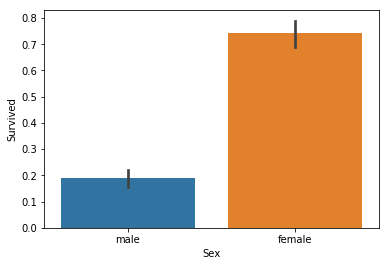

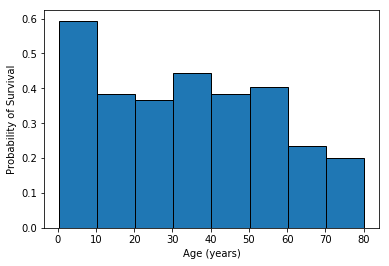

In [0]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

filtered = titanic_df[['Age', 'Survived']].dropna()

s, edges, _ = binned_statistic(filtered['Age'], filtered['Survived'], bins=8, statistic=np.mean)
plt.bar(edges[:-1], s, width=np.diff(edges), align="edge", ec="k")
plt.xlabel('Age (years)')
plt.ylabel('Probability of Survival')
plt.show()

A variation on this last one is that you can actually fit a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) (the sigmoid is a special case of the logistic function).  The plot below has the following features.

* The line is the estimate of the probability of survival based on a logistic model
* The shaded area around the line provides a confidence interval (areas with wide confidence intervals indicate *lower* confidence).  Confidence is dictated primarily by the amount of data in a particular area.
* The plot has a bit of jitter applied to it so that points don't overlap as much in the scatter plot (survived is either 0 or 1, but the plot shows values that are close to 0 and 1 but not exactly equal to either of those values).

Hint: if you want to know more about how regplot works, you can look up the documentation online or type:

```python
help(sns.regplot)
```

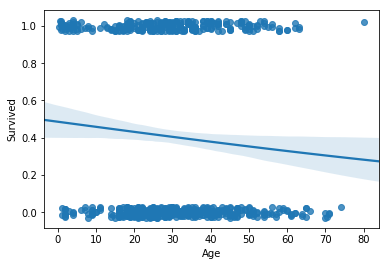

In [0]:
sns.regplot(x="Age", y="Survived", data=filtered,
...                  logistic=True, n_boot=500, y_jitter=.03)

## Small increases in accuracy are sad

> Unexpected that variables that should have an effect didn’t end up having an effect (adding another variable increased accuracy by only 1% (or even caused the accuracy to decrease))

Maybe this was addressed partially by our peptalk at the end of the in-class activity, but we wanted to reiterate that you should not get hung up on the accuracy numbers.  To help demonstrate this we will provide an example that shows why accuracy increases may not be what you predict based on your exploration of the data.

For this example, we'll use the Titanic dataset.  In the example we'll do the following.

1.  Construct a dataset with sex (coded as a binary column called `male`), age, plus a feature to represent young males (under the age of 5).
2.  Construxt a dataset with all of the features of (1) as well as the `Pclass` attribute (this was the cabin class the passenger was in).
3.  We'll divide the data into 10 randomly selected, non-overlapping subsets and use these a [cross validation folds](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation).
4.  We'll train model (1) and (2) on all but 1 of the folds and test on the remaining fold.  We'll do this 10 times so that every fold is used as the test set.
5.  We'll compare the performance of the models on each of these 10 folds.

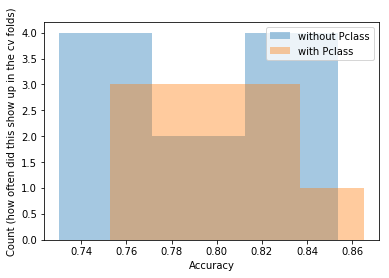

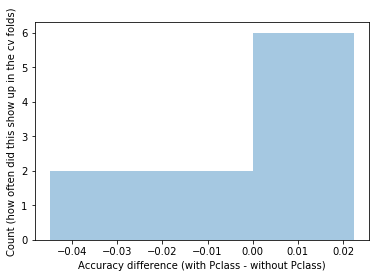

Average performance difference 0.0022846441947565466


In [0]:
# show survival as a function of pclass
# do some evaluation of whether or not it helps over age / sex / young male model.
from sklearn.model_selection import cross_val_score, KFold

titanic_age_sex = pd.concat((pd.get_dummies(titanic_df['Sex'], drop_first=True), titanic_df['Age']),axis=1)
titanic_age_sex['Age'] = titanic_age_sex['Age'].fillna(titanic_age_sex['Age'].mean())
titanic_age_sex_young_male = pd.concat((titanic_age_sex, (titanic_age_sex['Age'] < 5 & titanic_age_sex['male']).astype(int)), axis=1)

# manually create the fold iterator so we ensure we have the same folds over each model
kf = KFold(n_splits=10)

X = titanic_age_sex_young_male
y = titanic_df['Survived']
cv_scores = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=kf)
sns.distplot(cv_scores, kde=False, label='without Pclass')

# now let's add Pclass

X_with_pclass = pd.concat((titanic_age_sex_young_male, titanic_df['Pclass']), axis=1)
cv_scores_with_pclass = cross_val_score(LogisticRegression(solver='lbfgs'), X_with_pclass, y, cv=kf)
sns.distplot(cv_scores_with_pclass, kde=False, label='with Pclass')

plt.ylabel('Count (how often did this show up in the cv folds)')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

sns.distplot(cv_scores_with_pclass - cv_scores, kde=False)
plt.ylabel('Count (how often did this show up in the cv folds)')
plt.xlabel('Accuracy difference (with Pclass - without Pclass)')
plt.show()

print("Average performance difference", (cv_scores_with_pclass - cv_scores).mean())

You should notice based on the graph above that sometimes adding Pclass helps (positive accurace difference) and sometimes it hurts (negative accuracy difference).  This shows us that if we have a variable that seems weakly correlated with the outcome and we add it to the model, depending on which other parameters are already in the model it might not help us all that much.  Further, based on the luck of the draw (how we pick training versus test set) it might actually hurt.  ***WHEN YOU'RE PERFORMANCE GOES DOWN WHEN YOU PREDICTED IT WOULD GO UP, THAT DOES NOT MEAN YOU ARE BAD OR DON'T KNOW WHAT'S GOING ON.***

*rant complete*

As a counterpoint to this, there are other times when adding a variable to a model might produce a bit more reliable performance increase.  In general it is hard to know how things will turn out until you actually run the experiment.  Next, we'll do the same analysis as before but we'll add the `Sex` feature to a dataset that originally just includes `Pclass`.

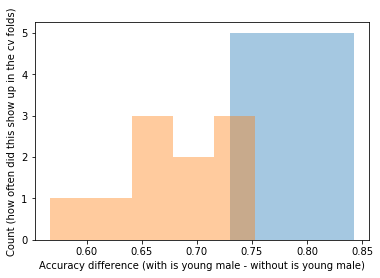

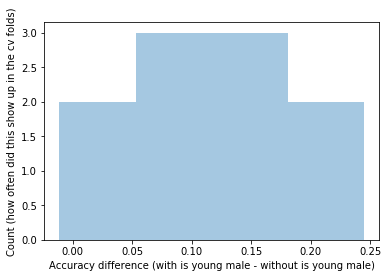

Average performance difference 0.10759051186017479


In [0]:
X = pd.concat((pd.get_dummies(titanic_df['Sex'], drop_first=True), titanic_df['Pclass']),axis=1)
y = titanic_df['Survived']
cv_scores_with_male = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=kf)
sns.distplot(cv_scores_with_male, kde=False, label='with male')

X = titanic_df[['Pclass']]
y = titanic_df['Survived']
cv_scores_without_male = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=kf)
sns.distplot(cv_scores_without_male, kde=False, label='without male')
plt.ylabel('Count (how often did this show up in the cv folds)')
plt.xlabel('Accuracy difference (with is young male - without is young male)')
plt.show()

sns.distplot(cv_scores_with_male - cv_scores_without_male, kde=False)
plt.ylabel('Count (how often did this show up in the cv folds)')
plt.xlabel('Accuracy difference (with is young male - without is young male)')
plt.show()

print("Average performance difference", (cv_scores_with_male - cv_scores_without_male).mean())

In ths case the performance difference is dramatically positive.  This analysis would give us high confidence that the model with the information on the sex of the passenger would score better on a test set.

## How do I Interpret the bias term of a logistic regression model?

> Question: All of us were confused on how to interpret the bias term. The term depends on the mix of the dataset.

In order to answer this question, let's fit a very simple logistic regression model to the titanic age / sex data.

In [0]:
X = titanic_age_sex
y = titanic_df['Survived']
# silence annoying warning about solver not being set and turn off weight penalty to ease comparison
model = LogisticRegression(solver='lbfgs', penalty='none')
model.fit(X, y)

print('model coefficients are', model.coef_)
print('model bias weight is', model.intercept_)

model coefficients are [[-2.50392072 -0.0054935 ]]
model bias weight is [1.21280233]


We've had a lot of practice interpreting the model coefficients (e.g., the first one indicates that being male has a negative effect on survival and being younger helps survival to a limited extent).  Given the way we are currently encoding the features, the bias term is difficult to interpret.  The reason for this is that the bias term is doing multiple things here.  First, it is encoding the overall mix of survived versus not survived in the data.  Secondly, it is allowing each of the models to effectively subtract a constant from each of the features before multiplying it by its corresponding weight.  When we mix these two things together, we wind up with a term that is pretty hard to interpret.

It turns out that if we transform our input data, `X`, by subtracing the mean of each column (such that the resulting dataset will have a mean of 0 for each column) will make the bias term easier to interpret.  Let's see how this works.

In [0]:
X_mean_zero = X - X.mean(axis=0)
print("just checking the mean!", X_mean_zero.mean(axis=0))
print()

# silence annoying warning about solver not being set and turn off weight penalty to ease comparison
model = LogisticRegression(solver='lbfgs', penalty='none')
model.fit(X_mean_zero, y)

print('model coefficients are', model.coef_)
print('model bias weight is', model.intercept_)

just checking the mean! male   -4.984166e-17
Age     6.408442e-14
dtype: float64

model coefficients are [[-2.50395081 -0.00549348]]
model bias weight is [-0.57185846]


Notice that the model coefficients are basically the same.  What did change is the bias term.  It will turn out that the bias term now roughly encodes the frequency of survived versus survived in the dataset.  Specifically the survival rate will be roughly (but not exactly)

$$\frac{1}{1+e^{-bias}}$$

In [0]:
print('Overall surival rate', y.mean())
print('Survival rate based on model bias term', 1/(1+np.exp(-model.intercept_)))

Overall surival rate 0.3838383838383838
Survival rate based on model bias term [0.3608081]


## Interpreting the Weights for non-Binary Features
> The biggest unanswered question is definitely how to interpret the weights, especially when dealing with non-binary features. 

We won't try to recreate this [very good explanation of how weight interpretation in logistic regression models works (link to NB)](http://nb.mit.edu/f/55512).  Once you've read it, we'll tie things up with a quick example.

Let's quickly train a logistic regression model on is male and age for the titanic dataset.  We'll examine the coefficients and discuss how they can be interpreted.

In [0]:
X = titanic_age_sex
y = titanic_df['Survived']
# silence annoying warning about solver not being set and turn off weight penalty to ease comparison
model = LogisticRegression(solver='lbfgs', penalty='none')
model.fit(X, y)

print('model coefficients are', model.coef_)

model coefficients are [[-2.50392072 -0.0054935 ]]


Based on the resource we linked above, we know that if we exponentiate these coefficients we can interpret them as the change in odds of the output being class 1 versus class 0 per unit change of the corresponding input feature.

So, if we change the is male column 1 unit (e.g., go from 0 to 1), this would change the odds of survival, $\frac{p(survived)}{p(died)}$, by a factor of $e^{-2.504} = 0.0818$.

Similarly, for each increase in age of 1 year (e.g., a 70 year old female passenger versus a 71 year old female passenger). this would change the odds of survival by a factor of $e^{-0.00549} = 0.994$.

To make this very precise, we'll show both of these below.

In [0]:
# We're using a 20 year old for this calculation, but it would work for any age.

# [0, 20] represents a female 20 year old
p_died, p_survived = model.predict_proba([[0, 20]])[0]
odds_for_female_20_year_old = p_survived / p_died

# [1, 20] represents a male 20 year old
p_died, p_survived = model.predict_proba([[1, 20]])[0]
odds_for_male_20_year_old = p_survived / p_died
print("Change in survival odds from increasing male feature by 1", odds_for_male_20_year_old / odds_for_female_20_year_old)


# We'll compare a female 20 year old with a female 21 year old
# the result is the same no matter the gender and the initial age

# [0, 21] represents a female 21 year old
p_died, p_survived = model.predict_proba([[0, 21]])[0]
odds_for_female_21_year_old = p_survived / p_died

print("Change in survival odds from increasing age feature by 1", odds_for_female_21_year_old / odds_for_female_20_year_old)

Change in survival odds from increasing male feature by 1 0.08176379634081835
Change in survival odds from increasing age feature by 1 0.9945215623811882


## How Do I Get High Performance with Image Data?!?

> Visual examples didn’t seem to work as well as the text-based examples because they didn’t give the opportunity to work different features (certain pixels having a certain weight vs certain features having a certain weight).

A few things to say here.

* We should have probably given more scaffolding on various image features to try.  There are a vast array of possible [image features](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html).
* In order to get position invariance of a feature (which was an issue for some datasets and not so much for others), you can do things like create a histogram of a feature (if your feature is 1-dimensional) and then use the histogram counts as input to your logistic regression model.  Another, more advanced technique uses the notion of visual words to summarize multidimensional features extracted from an image (a precise explanation of this is beyond the scope of this document, but see [this slide deck](https://kth.instructure.com/files/663173/download?download_frd=1) for more information). 

> How to effectively choose coefficients for things like Canny edge detection, HOG, and other image manipulation functions.

There are two, somewhat unsatisfying answers to this question.
1.  Play around with the various parameters of these image manipulation functions.  Visualize what it does to your training data (actually look at the transformed images).  If you are doing it right you should see salient features for the task becoming more prevalent.
2.  Think of the parameters of these functions as hyperparameters and search for good values using cross validation methods (such as [gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)).  Jake VanderPlas also has a good resource for learning about [tuning hyperparameters](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb).

## How Do I Interpret the Weights Learned for an Image Model?

> What are the best ways to look at the features of an image for a regression model? Are there any good visualization/plotting techniques for exploring image’s differently compared to straight feature data (like the Titanic dataset was)

The technique we showed in the assignment document for interpreting the weights for the smile dataset when pixels are used as inputs is a pretty good one.  We'll show it here for the smile dataset.

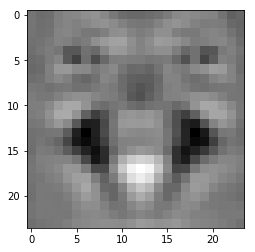

In [0]:
# setting C low (lambda = 1/C) makes the weights more interpretable
model = LogisticRegression(C=1/100, solver='lbfgs', max_iter=1000)
X = smile_images_vectorized
y = smile_y.ravel()
model.fit(X, y)
plt.imshow(model.coef_.reshape(24, 24), cmap='gray')
plt.show()

## How Do I Know What Model to Apply?

> There are so many different models to apply. How do you know which ones are most promising? Does it just come with experience and breadth of knowledge?

* Yes, experience does play a role.
* The more time you put into visualizing data, understanding model weights, and examining model errors the better you will be able to do this.  When you get into trouble is when you just start randomly changing your model around in unmotivated ways.  This is very tempting and easy to do with tools like scikit-learn, but it's best to focus on understanding the models you fit rather than improving performance.

> Accuracy increases follow understanding increases.
>
>        - anonymous -

(please print this slogan on a sticker and give it us).

## Issues with Multiclass Data

A lot of folks had issues working with the pets dataset due to the fact that it was both multiclass and didn't seem to have very clear relationships between the factors and adoption speed.

In the next few cells we'll show some visualizations you can create for such data.

In [0]:
pets_df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

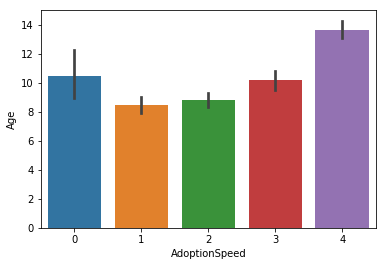

In [0]:
sns.barplot(x='AdoptionSpeed', y='Age', data=pets_df)
plt.show()

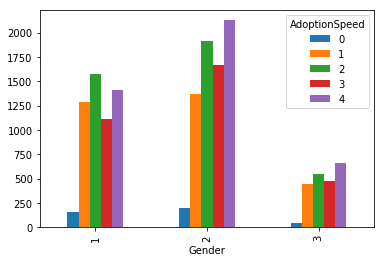

In [0]:
# Note: 1 is male, 2 is female, 3 is mixed (e.g., for adoptions with multiple animals)
pets_df.groupby('AdoptionSpeed')['Gender'].value_counts().unstack(0).plot.bar()
plt.show()

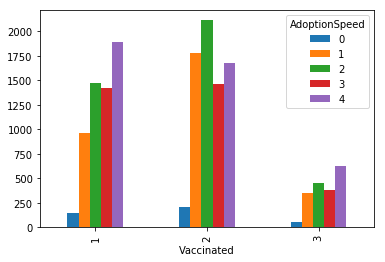

In [0]:
pets_df.groupby('AdoptionSpeed')['Vaccinated'].value_counts().unstack(0).plot.bar()
plt.show()

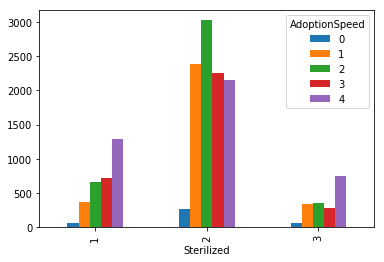

In [0]:
pets_df.groupby('AdoptionSpeed')['Sterilized'].value_counts().unstack(0).plot.bar()
plt.show()

This tells us that, surprisingly, sterilized pets are *less* likely to be adopted.  Age could be a confounding variable here (older pets are more likely to be fixed).

Next, we'll fit a model with gender, vaccinated, sterilized, quantity (of animals being adopted), and age.  We'll compare it to the model just using age.  The visualizations we'll use will be the same as in the "Small changes in accuracy are sad" section.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

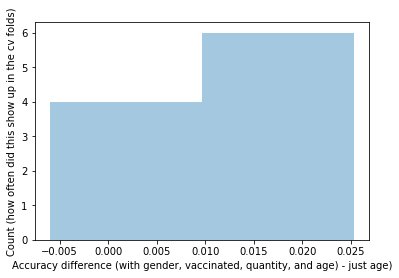

Average performance difference 0.011937558372248164


In [0]:
gender_dummy_vars = pd.get_dummies(pets_df['Gender'], drop_first=True)
vaccinated_dummy_vars = pd.get_dummies(pets_df['Vaccinated'], drop_first=True)
sterilized_dummy_vars = pd.get_dummies(pets_df['Sterilized'], drop_first=True)

X = pd.concat((gender_dummy_vars, vaccinated_dummy_vars, sterilized_dummy_vars, pets_df['Quantity'], pets_df['Age']), axis=1)
y = pets_df['AdoptionSpeed']

kf = KFold(n_splits=10)

cv_scores_all_features = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto'), X, y, cv=kf)
cv_scores_only_age = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto'), pets_df[['Age']], y, cv=kf)

sns.distplot(cv_scores_all_features - cv_scores_only_age, kde=False)
plt.ylabel('Count (how often did this show up in the cv folds)')
plt.xlabel('Accuracy difference (with gender, vaccinated, quantity, and age) - just age)')
plt.show()

print("Average performance difference", (cv_scores_all_features - cv_scores_only_age).mean())

We can also view the weights to understand what the model is learning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Index([2, 3, 2, 3, 2, 3, 'Quantity', 'Age'], dtype='object')


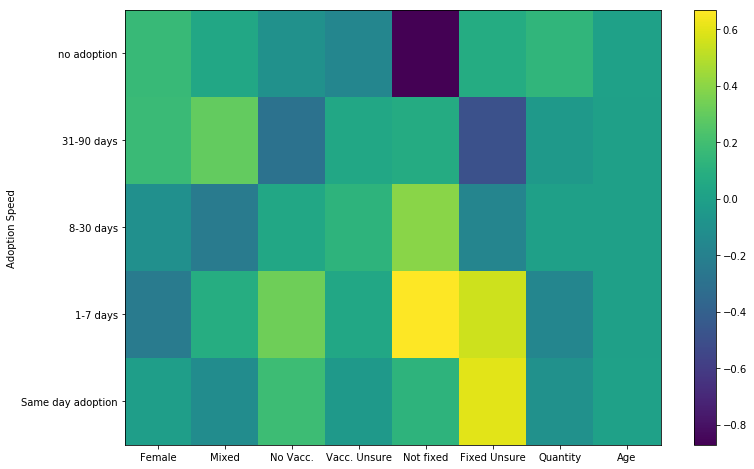

In [0]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
plt.figure(figsize=(12,8))
plt.pcolor(model.coef_)
plt.colorbar()
plt.ylabel('Adoption Speed')
plt.xticks(np.arange(0.5, 8.5, 1), ['Female', 'Mixed', 'No Vacc.', 'Vacc. Unsure', 'Not fixed', 'Fixed Unsure', 'Quantity', 'Age'])
plt.yticks(np.arange(0.5, 5.5, 1), ['Same day adoption', '1-7 days', '8-30 days', '31-90 days', 'no adoption'])
print(X.columns)

The heat map above shows us how the odds of a particular adoption speed change as we increase a particular feature by 1.  For instance, the yellow regions in this plot tell us that animals that are not fixed or where we don't know if they are fised are actually adopted faster.

## Reframing Multiclass Problems as a Binary Classification Problem

Some folks transformed the pet adoption problem into a binary classification task (adopted versus not adopted).  For some this made interpreting what the model was doing much easier (since we had given more scaffolding for binary classification).  It also made the performance of the model go up (since the task was now easier).  Comparing the performance for the original 5-way classification task to the binary classification task is like comparing apples to oranges.

If you wanted to use binary classification to solve the multiclass problem, you could chain together multiple binary classifiers.
* First predicted adopted versus not adopted.
* Using only the adopted pets, build a model of adopted in first 30 days versus 31-100 days.
* Using only the pets adopted in the first 30 days, build a model of adopted in a week or less versus 8-30 days.
.. etc.

In this way each model is only focusing on a specific binary decision and chaining the models together gives the result.  This sort of model is called a cascaded classifier.

## General Feedback on Assignment Structure

> (student) wasn’t a big a fan of all the new code that was introduced at once
Took a while to understand the example problems

This is great feedback.  We probably should have given more scaffolding, we'll be spiraling back to these libraries but we could have made it a bit smoother getting started with them.

> (student) thinks that more tutorials would be nice to help understand the assignments.

This part of the motivation for this notebook.

> Would like more time with the toolboxes to understand the concepts better

You will be getting more opportunities to explore these tools.

*** Thanks for the great feedback ***